# Notebook containing all the plots for the paper titled "Evidence from APOGEE for a major building block of the Milky Way halo buried in the Galactic Bulge" 

In order to successfully replicate all the plots contained in Horta et al (2020b), one must have access to the APOGEE (DR16) and Gaia (DR2) catalogues, as well as the GC catalogue from Horta et al (2020a). Other requirements include python modules such as numpy, scipy, astropy, galpy and matplotlib. This notebook assumes the IoM have already been determined using galpy (Bovy et al 2016) in a McMillan potential (McMillan et al 2017). 

In [1]:
# load in the necessary modules
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy import stats

In [2]:
# load the data
path = '/Users/danny/Desktop/IG-structure/sav/dr16astroNN_McMillan17P.fits'
tb = fits.open(path)
data = tb[1].data 

fehs = data.field('FE_H')
mgfe = data.field('MG_FE')
lz = data.field('Lz')
jz = data.field('jz')
jr = data.field('jr')
E = data.field('E')
ecc = data.field('e')
snr = data.field('SNR')
alfe = data.field('AL_FE')
alfe_err = data.field('AL_FE_ERR')
fehs_err = data.field('FE_H_ERR')
nife = data.field('NI_FE')
cfe = data.field('C_FE')
nfe = data.field('N_FE')
vr = data.field('vR')
vt = data.field('vT')
vz = data.field('vZ')
x = data.field('X')
y = data.field('Y')
z = data.field('Z')
vlos = data.field('VHELIO_AVG')
sife = data.field('SI_FE')
kfe = data.field('K_FE')
ofe = data.field('O_FE')
pfe = data.field('P_FE')
cafe = data.field('CA_FE')
mnfe = data.field('MN_FE')
cofe = data.field('CO_FE')
crfe = data.field('CR_FE')
tife = data.field('TI_FE')
Rgal = data.field('Rgal')
Zgal = data.field('Zgal')
apo_id = data.field('APOGEE_ID')
logg = data.field('LOGG')
teff = data.field('TEFF')
dist = data.field('weighted_dist')
zmax = data.field('zmax')
apo = data.field('rap')
fehs_err = data.field('FE_H_ERR')
mgfe_err = data.field('MG_FE_ERR')
dist_err = data.field('weighted_dist_error')
aspcap_flag = data.field('ASPCAPFLAG')

We will also load in the GC data from Horta et al (2020a) and remove all known GC members in APOGEE DR16

In [3]:
# LOAD THE DATA FOR THE GC LIST IN APOGEE
path = '/Users/danny/Desktop/IG-structure/sav/'
file = 'complete_fulldr16_nofehs.fits'
tb2 = fits.open(path+file)
data2 = tb2[1].data
gc_star_ids = data2.field('APOGEE_ID')
print('There are '+str(len(gc_star_ids))+' GC stars within 2 virial radii and 2 values of the velocity dispersion for all Galactic GCs')

There are 6022 GC stars within 2 virial radii and 2 values of the velocity dispersion for all Galactic GCs


De-normalise the IoM values

In [4]:
jr = np.array(jr)*220*8
lz = np.array(lz)*220*8
jz = np.array(jz)*220*8
vr = np.array(vr)*220
vt = np.array(vt)*220
vz = np.array(vz)*220
x = np.array(x)*8
y = np.array(y)*8
z = np.array(z)*8
Rgal = np.array(Rgal)*8
Zgal = np.array(Zgal)*8
apo = np.array(apo)*8

In [5]:
# clean the data
mask_gcs = np.isin(apo_id,gc_star_ids)
mask = ((snr >= 70) & (teff > 4000) & (teff < 6000) & (logg < 3) & (logg > 1) & ((dist_err/dist)<0.20) & (mask_gcs==False) & (fehs > -10) & (mgfe > -10) & (mnfe > -10) & (E < 0) & (lz < 10000) & (lz > -10000) & (aspcap_flag <8000000.) & (alfe_err > 0) )
print('There are '+str(len(fehs[mask]))+' stars in our parent sample')


There are 144890 stars in our parent sample


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until


Figure 1

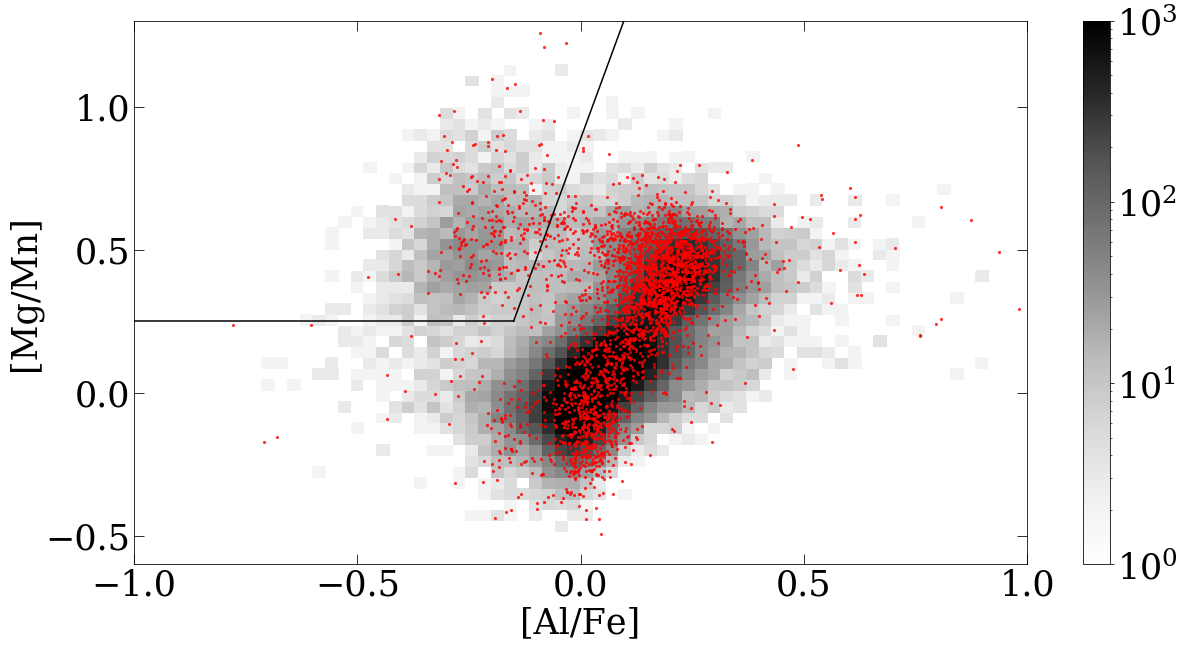

In [6]:
import matplotlib.axes as ax
from matplotlib.colors import LogNorm
# Get current size
fig_size = plt.rcParams["figure.figsize"]
plt.rc('font',family='serif',size=16)
fig_size[0] = 20
fig_size[1] = 10
mgmn = mgfe - mnfe
rads = np.sqrt(Rgal**2+Zgal**2)
labs=35
tcks=35
plt.hist2d(alfe[mask], mgmn[mask], norm=LogNorm(), bins=(70, 50),range=[[-1.,1],[-0.6,1.3]], cmap='Greys')
plt.clim(1,1000)
cb= plt.colorbar()
cb.ax.tick_params(labelsize=tcks)
plt.xlabel('[Al/Fe]',size=labs)
plt.scatter(alfe[mask&(rads<3)], mgmn[mask&(rads<3)], c='red', alpha=0.8,s=10,lw=0)
plt.ylabel('[Mg/Mn]',size=labs)
plt.tick_params(direction='in',right=True,top=True,length=10)
plt.xticks((np.arange(-3.0,1.5,step=0.5)),fontsize=tcks)
plt.yticks((np.arange(-1.5,1.5,step=0.5)),fontsize=tcks)
plt.tick_params(which='minor',direction='in',right=True,top=True,length=2)
plt.xlim(-1.0,1.0)
plt.ylim(-0.6,1.3)
plt.plot([-1,-0.15],[0.25,0.25], 'k', c='black')
x = np.arange(-0.15,0.4,0.01)
plt.plot(x,4.25*x+0.8875, 'k', c='black')
plt.savefig('/Users/danny/Desktop/IG-structure/plots/figure1.pdf', format='pdf', dpi=400, bbox_inches='tight')


In [12]:
# set accreted mask
acc_mask = ((mnfe > -10) & ((mgmn >= 0.25) & (alfe < -0.15)) |  ((mgmn >= 4.25*alfe+0.8875) & (alfe >= -0.15)))
print('There are '+str(len(fehs[mask&acc_mask&(rads<3)]))+' accreted stars R<3kpc')
print('There are '+str(len(fehs[mask&~acc_mask&(rads<3)]))+' in situ stars R<3kpc')

print('There are '+str(len(fehs[mask&acc_mask&(rads>3)]))+' accreted stars R>3kpc')
print('There are '+str(len(fehs[mask&~acc_mask&(rads>3)]))+' in situ stars R>3kpc')


There are 234 accreted stars R<3kpc
There are 2755 in situ stars R<3kpc
There are 2583 accreted stars R>3kpc
There are 139318 in situ stars R>3kpc


Figure 2

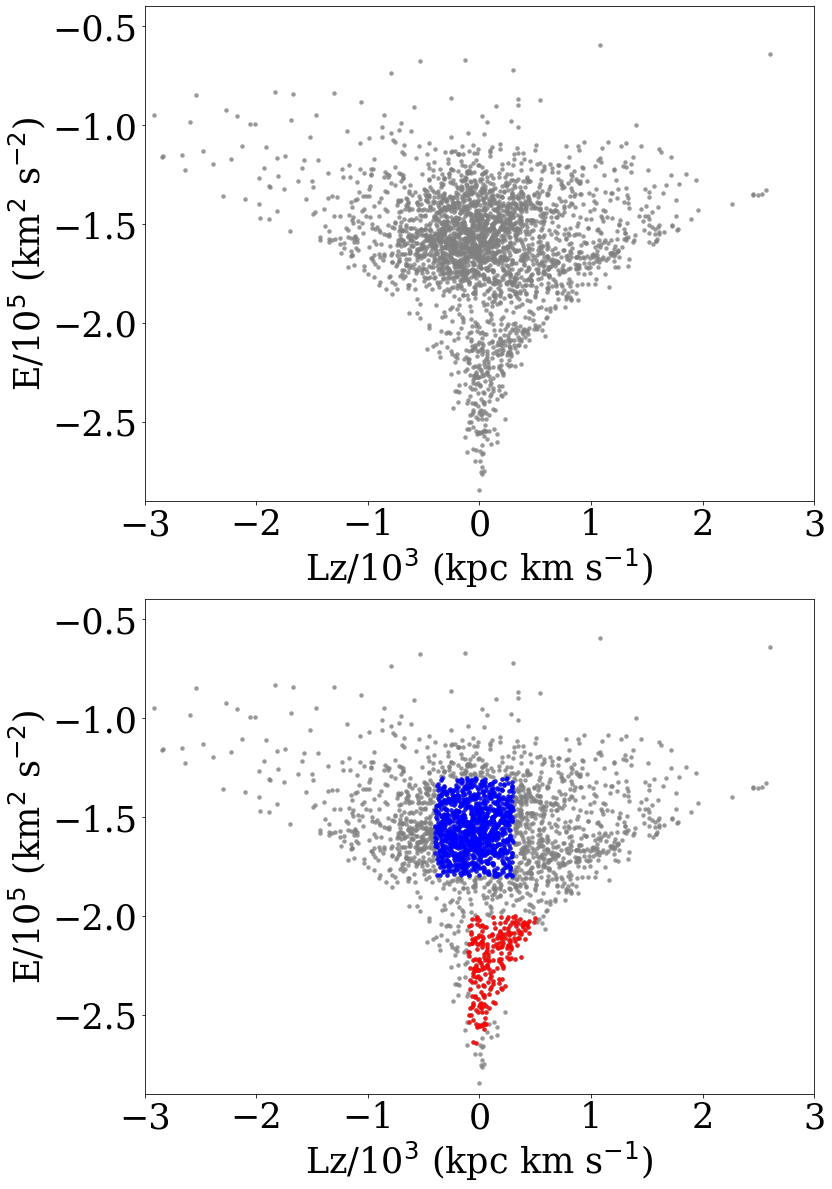

In [8]:
lzcomp = lz[mask&acc_mask]/1.e3
Ecomp = E[mask&acc_mask]/1.e5
# IG structure
div_ig = 0.933*lzcomp - 2.617
mask_ig = ( (lzcomp > -0.1) & (lzcomp < 0.5) & (Ecomp < -2.0) & (Ecomp > div_ig)  )
#GE/S
mask_ge = ((lzcomp > -0.4) & (lzcomp < 0.3) & (Ecomp > -1.8) & (Ecomp < -1.3))
lz_ig = lzcomp[mask_ig]
E_ig = Ecomp[mask_ig]
lz_ge = lzcomp[mask_ge]
E_ge = Ecomp[mask_ge]
# plot
plt.figure(figsize=(12,20))
plt.rc('font',family='serif',size=16)
plt.subplot(211)
plt.scatter(lzcomp,Ecomp,c='gray',alpha=0.8,s=20,lw=0)
plt.xlabel('Lz/10$^3$ (kpc km s$^{-1}$)',size=labs)
plt.ylabel('E/10$^5$ (km$^2$ s$^{-2}$)',size=labs)
plt.xticks((np.arange(-5,5,step=1.0)),fontsize=tcks)
plt.yticks((np.arange(-4,1,step=0.5)),fontsize=tcks)
plt.xlim(-3,3)
plt.ylim(-2.9,-0.4)
ax = plt.subplot(212)
plt.scatter(lzcomp,Ecomp,c='gray',alpha=0.8,s=20,lw=0)
plt.scatter(lz_ig,E_ig,c='red',alpha=0.8,s=20,lw=0)
plt.scatter(lz_ge,E_ge,c='blue',alpha=0.8,s=20,lw=0)
plt.xlabel('Lz/10$^3$ (kpc km s$^{-1}$)',size=labs)
plt.ylabel('E/10$^5$ (km$^2$ s$^{-2}$)',size=labs)
plt.xticks((np.arange(-5,5,step=1.0)),fontsize=tcks)
plt.yticks((np.arange(-4,1,step=0.5)),fontsize=tcks)
plt.xlim(-3,3)
plt.ylim(-2.9,-0.4)
plt.savefig('/Users/danny/Desktop/IG-structure/plots/figure2.pdf', format='pdf', dpi=400, bbox_inches='tight')


Figure 3

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in less
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:84: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


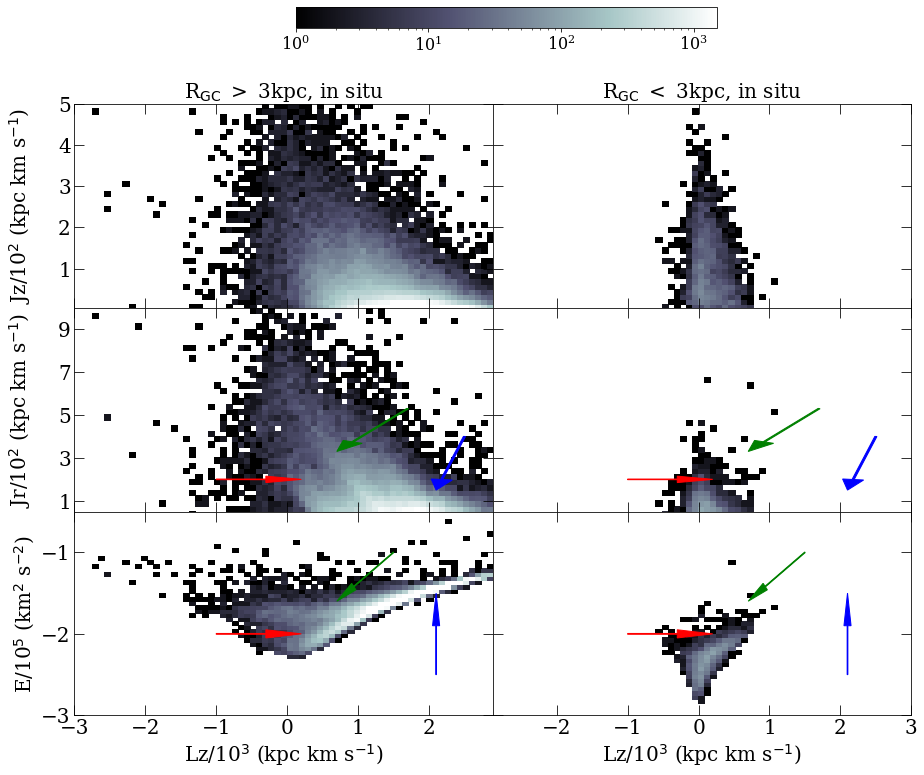

In [70]:
# ACTION PLOTS: In situ sample
import matplotlib as mpl
import matplotlib.gridspec as gridspec
# Get current size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
labs=20
tcks=20
cmax = 1500
#Remove NaNs:
lz[mask&~acc_mask&(rads>3)][np.isnan(lz[mask&~acc_mask&(rads>3)])] = 9999
jz[mask&~acc_mask&(rads>3)][np.isnan(jz[mask&~acc_mask&(rads>3)])] = -100
jr[mask&~acc_mask&(rads>3)][np.isnan(jr[mask&~acc_mask&(rads>3)])] = -100
E[mask&~acc_mask&(rads>3)][np.isnan(E[mask&~acc_mask&(rads>3)])] = 10000

mask_goodh =  (jr[mask&~acc_mask&(rads>3)] < 10000) 

lzo = lz[mask&~acc_mask&(rads>3)][mask_goodh]/1000.
jzo = jz[mask&~acc_mask&(rads>3)][mask_goodh]/100.
jro = jr[mask&~acc_mask&(rads>3)][mask_goodh]/100.
enero = E[mask&~acc_mask&(rads>3)][mask_goodh]/1.e5

fig= plt.figure(figsize=(15,15),constrained_layout=True)
gs = gridspec.GridSpec(4,2)
gs.update(wspace=0, hspace=0) # set the spacing between axes. 
plt.subplot(gs[0])
plt.hist2d(lzo, jzo, norm=mpl.colors.LogNorm(), bins=(70, 40), range=[[-3,3],[0,5]], cmap='bone')
plt.title('R$_\mathrm{GC}$ $>$ 3kpc, in situ',fontsize=labs)
plt.clim(1,cmax)
plt.xticks((np.arange(-4,4,step=1)),fontsize=tcks)
plt.yticks((np.arange(-1,10,step=1)),fontsize=tcks)
plt.ylabel('Jz/10$^2$ (kpc km s$^{-1}$)',size=labs,labelpad=25)
plt.xlim(-3,2.9)
plt.ylim(0.05,5)
plt.tick_params(direction='in',right=True,top=True,length=10,labelbottom=False)

ax = plt.subplot(gs[1])
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.yaxis.set_ticks_position("both")
plt.hist2d(lz[mask&~acc_mask&(rads<3)]/1000., jz[mask&~acc_mask&(rads<3)]/100., norm=mpl.colors.LogNorm(), bins=(70, 40), range=[[-3,3],[0,5]], cmap='bone')
plt.title('R$_\mathrm{GC}$ $<$ 3kpc, in situ',fontsize=labs)
plt.clim(1,cmax)
#cbaxes = fig.add_axes([0.8, 0.1, 0.03, 0.8]) 
#cb = plt.colorbar(ax1, cax = cbaxes)  
plt.xticks((np.arange(-4,4,step=1)),fontsize=tcks)
plt.yticks((np.arange(-1,10,step=1)),fontsize=tcks)
#plt.ylabel('Jz/10$^2$ (kpc km s$^{-1}$)',size=labs)
plt.xlim(-2.9,3)
plt.ylim(0.05,5)
plt.tick_params(direction='in',right=True,top=True,length=10,labelbottom=False,labelright=False)

plt.subplot(gs[2])
plt.hist2d(lzo, jro, norm=mpl.colors.LogNorm(), bins=(70, 40), range=[[-3,3],[0,10]], cmap='bone')
plt.clim(1,cmax)
plt.xticks((np.arange(-4,4,step=1)),fontsize=tcks)
plt.yticks((np.arange(-1,20,step=2)),fontsize=tcks)
plt.ylabel('Jr/10$^2$ (kpc km s$^{-1}$)',size=labs,labelpad=25)
plt.xlim(-3,2.9)
plt.ylim(0.5,10)
plt.tick_params(direction='in',right=True,top=True,length=10,labelbottom=False)
plt.arrow(1.7,5.3,-1,-2,width=0.03,head_width=0.3,head_length=0.5,length_includes_head=True,color='green')
plt.arrow(-1,2,1.2,0,width=0.03,head_width=0.3,head_length=0.5,length_includes_head=True,color='red')
plt.arrow(2.5,4,-0.4,-2.5,width=0.03,head_width=0.3,head_length=0.5,length_includes_head=True,color='blue')

ax = plt.subplot(gs[3])
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.yaxis.set_ticks_position("both")
plt.hist2d(lz[mask&~acc_mask&(rads<3)]/1000., jr[mask&~acc_mask&(rads<3)]/100., norm=mpl.colors.LogNorm(), bins=(70, 40), range=[[-3,3],[0,10]], cmap='bone')
plt.clim(1,cmax)
plt.xticks((np.arange(-4,4,step=1)),fontsize=tcks)
plt.yticks((np.arange(-1,10,step=2)),fontsize=tcks)
plt.xlim(-2.9,3)
plt.ylim(0.5,10)
plt.arrow(1.7,5.3,-1,-2,width=0.03,head_width=0.3,head_length=0.5,length_includes_head=True,color='green')
plt.arrow(-1,2,1.2,0,width=0.03,head_width=0.3,head_length=0.5,length_includes_head=True,color='red')
plt.arrow(2.5,4,-0.4,-2.5,width=0.03,head_width=0.3,head_length=0.5,length_includes_head=True,color='blue')
plt.tick_params(direction='in',right=True,top=True,length=10,labelbottom=False,labelright=False)

plt.subplot(gs[4])
color = plt.hist2d(lzo, enero, norm=mpl.colors.LogNorm(), bins=(70, 50),range=[[-3,3],[-3,-0.5]], cmap='bone')
fig.subplots_adjust()
plt.clim(1,cmax)
plt.xticks((np.arange(-10,10,step=1)),fontsize=tcks)
plt.yticks((np.arange(-50,0,step=1)),fontsize=tcks)
plt.xlabel('Lz/10$^3$ (kpc km s$^{-1}$)',size=labs)
plt.ylabel('E/10$^5$ (km$^2$ s$^{-2}$)',size=labs)
plt.xlim(-3,2.9)
plt.ylim(-3,-0.5)
plt.tick_params(direction='in',right=True,top=True,length=10,labelright=False)
plt.arrow(1.5,-1,-0.8,-0.6,width=0.01,head_width=0.1,head_length=0.3,length_includes_head=True,color='green')
plt.arrow(-1,-2,1.2,0,width=0.01,head_width=0.1,head_length=0.5,length_includes_head=True,color='red')
plt.arrow(2.1,-2.5,0,1,width=0.01,head_width=0.1,head_length=0.4,length_includes_head=True,color='blue')
cbar_ax = fig.add_axes([.33, .95, 0.39, 0.02])
fig.colorbar(color[-1],cax=cbar_ax,orientation='horizontal')

ax = plt.subplot(gs[5])
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.yaxis.set_ticks_position("both")
plt.hist2d(lz[mask&~acc_mask&(rads<3)]/1000., E[mask&~acc_mask&(rads<3)]/1.e5, norm=mpl.colors.LogNorm(), bins=(70, 50),range=[[-3,3],[-3,-0.5]], cmap='bone')
plt.tick_params(direction='in',right=True,top=True,length=10,labelright=False)
plt.clim(1,cmax)
plt.xticks((np.arange(-4,4,step=1)),fontsize=tcks)
plt.yticks((np.arange(-50,0,step=1)),fontsize=tcks)
plt.xlim(-2.9,3)
plt.ylim(-3,-0.5)
plt.arrow(1.5,-1,-0.8,-0.6,width=0.01,head_width=0.1,head_length=0.3,length_includes_head=True,color='green')
plt.arrow(-1,-2,1.2,0,width=0.01,head_width=0.1,head_length=0.5,length_includes_head=True,color='red')
plt.arrow(2.1,-2.5,0,1,width=0.01,head_width=0.1,head_length=0.4,length_includes_head=True,color='blue')
plt.xlabel('Lz/10$^3$ (kpc km s$^{-1}$)',size=labs)
plt.tick_params(labelright=False)
plt.savefig('/Users/danny/Desktop/IG-structure/plots/figure3.pdf', format='pdf', dpi=400, bbox_inches='tight')



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


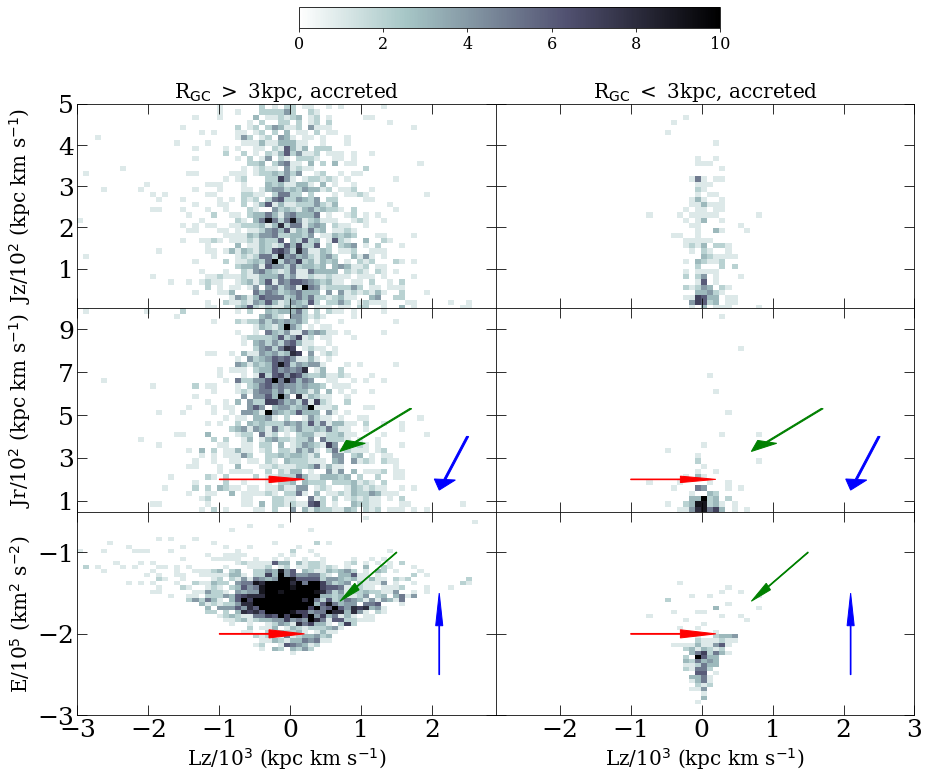

In [71]:
# ACTION PLOTS: Low Al/Fe sample
import matplotlib as mpl
# Get current size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
labs=20
tcks=25
cmax = 10

fig= plt.figure(figsize=(15,15),constrained_layout=True)
gs = gridspec.GridSpec(4,2)
gs.update(wspace=0, hspace=0) # set the spacing between axes. 
plt.subplot(gs[0])
plt.hist2d(lz[mask&acc_mask&(rads>3)]/1000., jz[mask&acc_mask&(rads>3)]/100., bins=(70, 40), range=[[-3,3],[0,5]], cmap='bone_r')
plt.title('R$_\mathrm{GC}$ $>$ 3kpc, accreted',fontsize=labs)
plt.clim(0,cmax) 
plt.xticks((np.arange(-4,4,step=1)),fontsize=tcks)
plt.yticks((np.arange(-1,10,step=1)),fontsize=tcks)
plt.ylabel('Jz/10$^2$ (kpc km s$^{-1}$)',size=labs,labelpad=25)
plt.xlim(-3,2.9)
plt.ylim(0.05,5)
plt.tick_params(direction='in',right=True,top=True,length=10,labelbottom=False)

ax = plt.subplot(gs[1])
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.yaxis.set_ticks_position("both")
plt.hist2d(lz[mask&acc_mask&(rads<3)]/1000., jz[mask&acc_mask&(rads<3)]/100., bins=(70, 40), range=[[-3,3],[0,5]], cmap='bone_r')
plt.title('R$_\mathrm{GC}$ $<$ 3kpc, accreted',fontsize=labs)
plt.clim(0,cmax)
plt.xticks((np.arange(-4,4,step=1)),fontsize=tcks)
plt.yticks((np.arange(-1,10,step=1)),fontsize=tcks)
plt.xlim(-2.9,3)
plt.ylim(0.05,5)
plt.tick_params(direction='in',right=True,top=True,length=10,labelbottom=False,labelright=False)

plt.subplot(gs[2])
plt.hist2d(lz[mask&acc_mask&(rads>3)]/1000., jr[mask&acc_mask&(rads>3)]/100., bins=(70, 40), range=[[-3,3],[0,10]], cmap='bone_r')
plt.clim(0,cmax)
#plt.colorbar()
plt.xticks((np.arange(-4,4,step=1)),fontsize=tcks)
plt.yticks((np.arange(-1,20,step=2)),fontsize=tcks)
plt.ylabel('Jr/10$^2$ (kpc km s$^{-1}$)',size=labs,labelpad=25)
plt.xlim(-3,2.9)
plt.ylim(0.5,10)
plt.tick_params(direction='in',right=True,top=True,length=10,labelbottom=False)
plt.arrow(1.7,5.3,-1,-2,width=0.03,head_width=0.3,head_length=0.5,length_includes_head=True,color='green')
plt.arrow(-1,2,1.2,0,width=0.03,head_width=0.3,head_length=0.5,length_includes_head=True,color='red')
plt.arrow(2.5,4,-0.4,-2.5,width=0.03,head_width=0.3,head_length=0.5,length_includes_head=True,color='blue')

ax = plt.subplot(gs[3])
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.yaxis.set_ticks_position("both")
plt.hist2d(lz[mask&acc_mask&(rads<3)]/1000., jr[mask&acc_mask&(rads<3)]/100., bins=(70, 40), range=[[-3,3],[0,10]], cmap='bone_r')
plt.clim(0,cmax)  
plt.xticks((np.arange(-4,4,step=1)),fontsize=tcks)
plt.yticks((np.arange(-1,10,step=2)),fontsize=tcks)
plt.xlim(-2.9,3)
plt.ylim(0.5,10)
plt.arrow(1.7,5.3,-1,-2,width=0.03,head_width=0.3,head_length=0.5,length_includes_head=True,color='green')
plt.arrow(-1,2,1.2,0,width=0.03,head_width=0.3,head_length=0.5,length_includes_head=True,color='red')
plt.arrow(2.5,4,-0.4,-2.5,width=0.03,head_width=0.3,head_length=0.5,length_includes_head=True,color='blue')
plt.tick_params(direction='in',right=True,top=True,length=10,labelbottom=False,labelright=False)


plt.subplot(gs[4])
color = plt.hist2d(lz[mask&acc_mask&(rads>3)]/1000., E[mask&acc_mask&(rads>3)]/1.e5, bins=(70, 50),range=[[-3,3],[-3,-0.5]], cmap='bone_r')
fig.subplots_adjust()
plt.clim(0,cmax)
plt.xticks((np.arange(-10,10,step=1)),fontsize=tcks)
plt.yticks((np.arange(-50,0,step=1)),fontsize=tcks)
plt.xlabel('Lz/10$^3$ (kpc km s$^{-1}$)',size=labs)
plt.ylabel('E/10$^5$ (km$^2$ s$^{-2}$)',size=labs)
plt.xlim(-3,2.9)
plt.ylim(-3,-0.5)
plt.tick_params(direction='in',right=True,top=True,length=10,labelright=False)
plt.arrow(1.5,-1,-0.8,-0.6,width=0.01,head_width=0.1,head_length=0.3,length_includes_head=True,color='green')
plt.arrow(-1,-2,1.2,0,width=0.01,head_width=0.1,head_length=0.5,length_includes_head=True,color='red')
plt.arrow(2.1,-2.5,0,1,width=0.01,head_width=0.1,head_length=0.4,length_includes_head=True,color='blue')
cbar_ax = fig.add_axes([.33, .95, 0.39, 0.02])
fig.colorbar(color[-1],cax=cbar_ax,orientation='horizontal')

ax = plt.subplot(gs[5])
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.yaxis.set_ticks_position("both")
plt.hist2d(lz[mask&acc_mask&(rads<3)]/1000., E[mask&acc_mask&(rads<3)]/1.e5, bins=(70, 50),range=[[-3,3],[-3,-0.5]], cmap='bone_r')
plt.clim(0,cmax)
plt.xticks((np.arange(-4,4,step=1)),fontsize=tcks)
plt.yticks((np.arange(-50,0,step=1)),fontsize=tcks)
plt.xlim(-2.9,3)
plt.ylim(-3,-0.5)
plt.arrow(1.5,-1,-0.8,-0.6,width=0.01,head_width=0.1,head_length=0.3,length_includes_head=True,color='green')
plt.arrow(-1,-2,1.2,0,width=0.01,head_width=0.1,head_length=0.5,length_includes_head=True,color='red')
plt.arrow(2.1,-2.5,0,1,width=0.01,head_width=0.1,head_length=0.4,length_includes_head=True,color='blue')
plt.tick_params(direction='in',right=True,top=True,length=10,labelright=False)
plt.xlabel('Lz/10$^3$ (kpc km s$^{-1}$)',size=labs)
plt.savefig('/Users/danny/Desktop/IG-structure/plots/figure4.pdf', format='pdf', dpi=400, bbox_inches='tight')


Figure 5

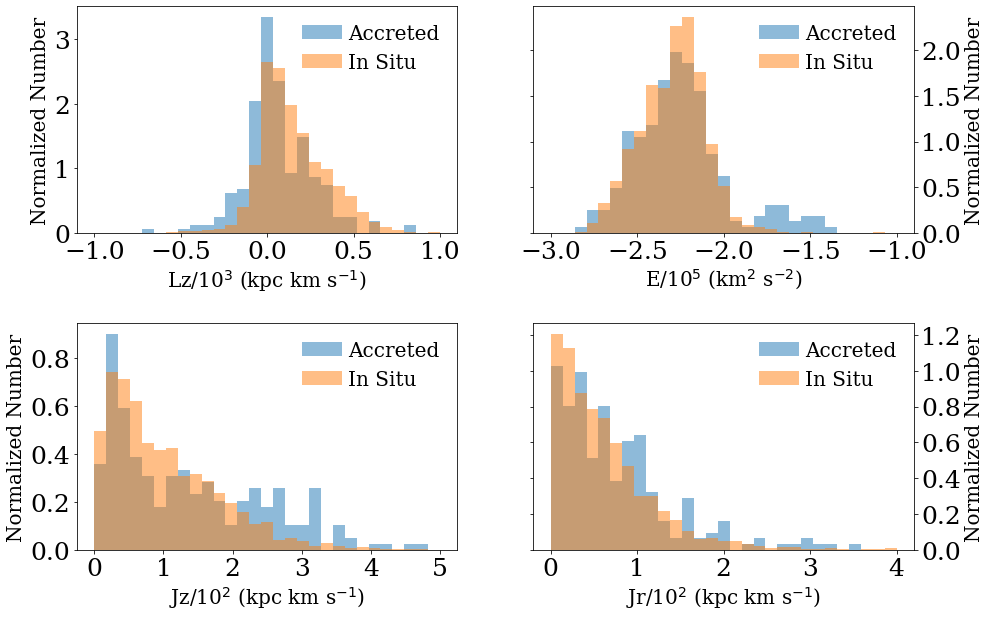

In [72]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 10
#Figure settings (font sizes of ticks and labels)
labs=20
tcks=25

gs = gridspec.GridSpec(2,2)
gs.update(wspace=0.2, hspace=0.4) # set the spacing between axes. 
plt.subplot(gs[0])
bins = np.linspace(-1,1,30)
plt.hist(lz[mask&acc_mask&(rads<3)]/1.e3, bins, alpha=0.5, density=True, label='Accreted')
plt.hist(lz[mask&~acc_mask&(rads<3)]/1.e3, bins, alpha=0.5, density=True, label='In Situ')
plt.xlabel('Lz/10$^3$ (kpc km s$^{-1}$)',size=labs)
plt.ylabel('Normalized Number',size=labs)
plt.legend(frameon=False,fontsize=20,handletextpad=0.3,loc='upper right')
plt.xticks(fontsize=tcks)
plt.yticks(fontsize=tcks)

ax = plt.subplot(gs[1])
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.yaxis.set_ticks_position("both")
bins = np.linspace(-3,-1,30)
plt.hist(E[mask&acc_mask&(rads<3)]/1.e5, bins, alpha=0.5, density=True, label='Accreted')
plt.hist(E[mask&~acc_mask&(rads<3)]/1.e5, bins, alpha=0.5, density=True, label='In Situ')
plt.xlabel('E/10$^5$ (km$^2$ s$^{-2}$)',size=labs)
plt.ylabel('Normalized Number',size=labs)
plt.legend(frameon=False,fontsize=20,handletextpad=0.3,loc='upper right')
plt.xticks(fontsize=tcks)
plt.yticks(fontsize=tcks)

plt.subplot(gs[2])
bins = np.linspace(0,5,30)
plt.hist(jz[mask&acc_mask&(rads<3)]/1.e2, bins, alpha=0.5, density=True, label='Accreted')
plt.hist(jz[mask&~acc_mask&(rads<3)]/1.e2, bins, alpha=0.5, density=True, label='In Situ')
plt.xlabel('Jz/10$^2$ (kpc km s$^{-1}$)',size=labs)
plt.ylabel('Normalized Number',size=labs)
plt.legend(frameon=False,fontsize=20,handletextpad=0.3,loc='upper right')
plt.xticks(fontsize=tcks)
plt.yticks(fontsize=tcks)

ax = plt.subplot(gs[3])
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.yaxis.set_ticks_position("both")
bins = np.linspace(0,4,30)
plt.hist(jr[mask&acc_mask&(rads<3)]/1.e2, bins, alpha=0.5, density=True, label='Accreted')
plt.hist(jr[mask&~acc_mask&(rads<3)]/1.e2, bins, alpha=0.5, density=True, label='In Situ')
plt.xlabel('Jr/10$^2$ (kpc km s$^{-1}$)',size=labs)
plt.ylabel('Normalized Number',size=labs)
plt.legend(frameon=False,fontsize=20,handletextpad=0.3,loc='upper right')
plt.xticks(fontsize=tcks)
plt.yticks(fontsize=tcks)
plt.savefig('/Users/danny/Desktop/IG-structure/plots/figure5.pdf', format='pdf', dpi=400, bbox_inches='tight')



Figure 6

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


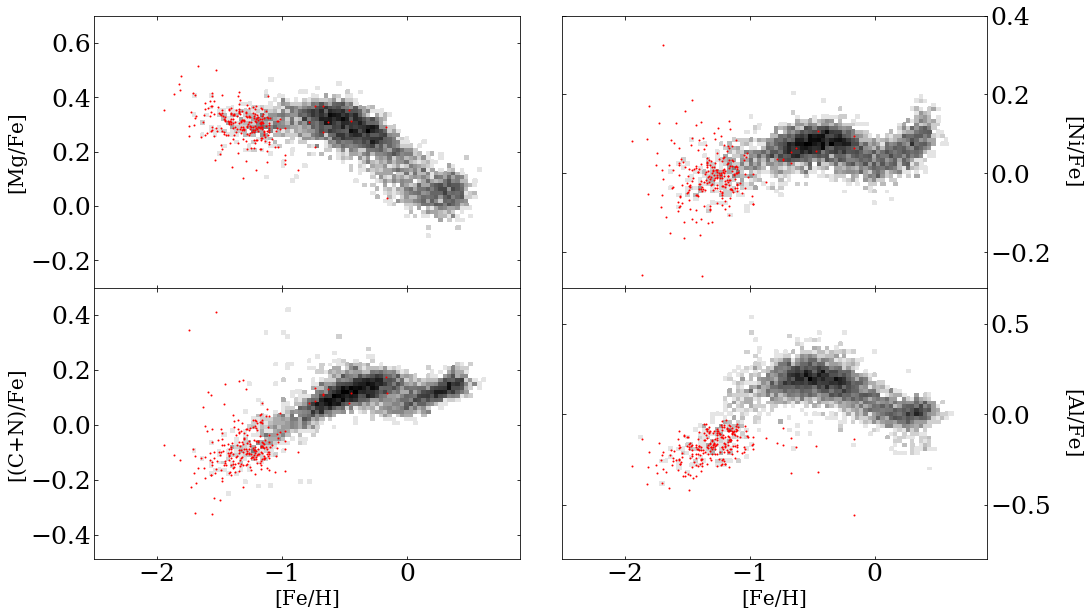

In [19]:
#Calculate [(C+N)/Fe]
cnfe = np.log10(10**(cfe+fehs+8.39) + 10**(nfe+fehs+7.78)) - np.log10(10.**8.39 + 10.**7.78) - fehs
xup = 0.9
xlo = -2.5

plt.figure(figsize=(16,10))
plt.rc('font',family='serif',size=20)
plt.subplot(221)
plt.hist2d(fehs[mask&(rads<4)],mgfe[mask&(rads<4)],norm=mpl.colors.LogNorm(), bins=(100,70), range=[[xlo,xup],[-0.3,0.7]], cmap='Greys',rasterized=True)
plt.scatter(fehs[mask&acc_mask][mask_ig],mgfe[mask&acc_mask][mask_ig],s=1,c='r',rasterized=True)
plt.tick_params(labelsize=25,direction='in',axis='both',left=True, right=True,top=True,labelbottom=False)
plt.ylim(-0.3,0.7)
plt.xlim(xlo,xup)
plt.ylabel('[Mg/Fe]')

ax = plt.subplot(222)
ax.hist2d(fehs[mask&(rads<4)],nife[mask&(rads<4)],norm=mpl.colors.LogNorm(), bins=(100,70), range=[[xlo,xup],[-0.3,0.4]], cmap='Greys',rasterized=True)
ax.scatter(fehs[mask&acc_mask][mask_ig],nife[mask&acc_mask][mask_ig],s=1,c='r',rasterized=True)
ax.tick_params(labelsize=25,direction='in',axis='both',left=True, right=True,top=True,labelbottom=False)
ax.set_ylabel('[Ni/Fe]',rotation=270,labelpad=30)
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.yaxis.set_ticks_position('both')
ax.set_ylim(-0.29,0.4)
ax.set_xlim(xlo,xup)
 
plt.subplot(223)
plt.hist2d(fehs[mask&(rads<4)],cnfe[mask&(rads<4)],norm=mpl.colors.LogNorm(), bins=(100,70), range=[[xlo,xup],[-0.5,0.5]], cmap='Greys',rasterized=True)
plt.scatter(fehs[mask&acc_mask][mask_ig],cnfe[mask&acc_mask][mask_ig],s=1,c='r',rasterized=True)
plt.tick_params(labelsize=25,direction='in',axis='both',left=True, right=True,top=True)
plt.ylabel('[(C+N)/Fe]')
plt.xlabel('[Fe/H]')
plt.ylim(-0.49,0.5)
plt.xlim(xlo,xup)
 
ax = plt.subplot(224)
ax.hist2d(fehs[mask&(rads<4)],alfe[mask&(rads<4)],norm=mpl.colors.LogNorm(), bins=(100,70), range=[[xlo,xup],[-0.8,0.7]], cmap='Greys',rasterized=True)
ax.scatter(fehs[mask&acc_mask][mask_ig],alfe[mask&acc_mask][mask_ig],s=1,c='r',rasterized=True)
plt.tick_params(labelsize=25,direction='in',axis='both',left=True, right=True,top=True)
ax.set_ylabel('[Al/Fe]',rotation=270,labelpad=30)
ax.set_xlabel('[Fe/H]')
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.yaxis.set_ticks_position('both')
ax.set_ylim(-0.8,0.7)
ax.set_xlim(xlo,xup)
 
plt.subplots_adjust(hspace=0,wspace=0.1)
# plt.savefig('/Users/danny/Desktop/IG-structure/plots/figure6.pdf', format='pdf', dpi=400, bbox_inches='tight')




Figure 7. For this figure you need access to the EAGLE numerical simulations. Here we just imported the final plot

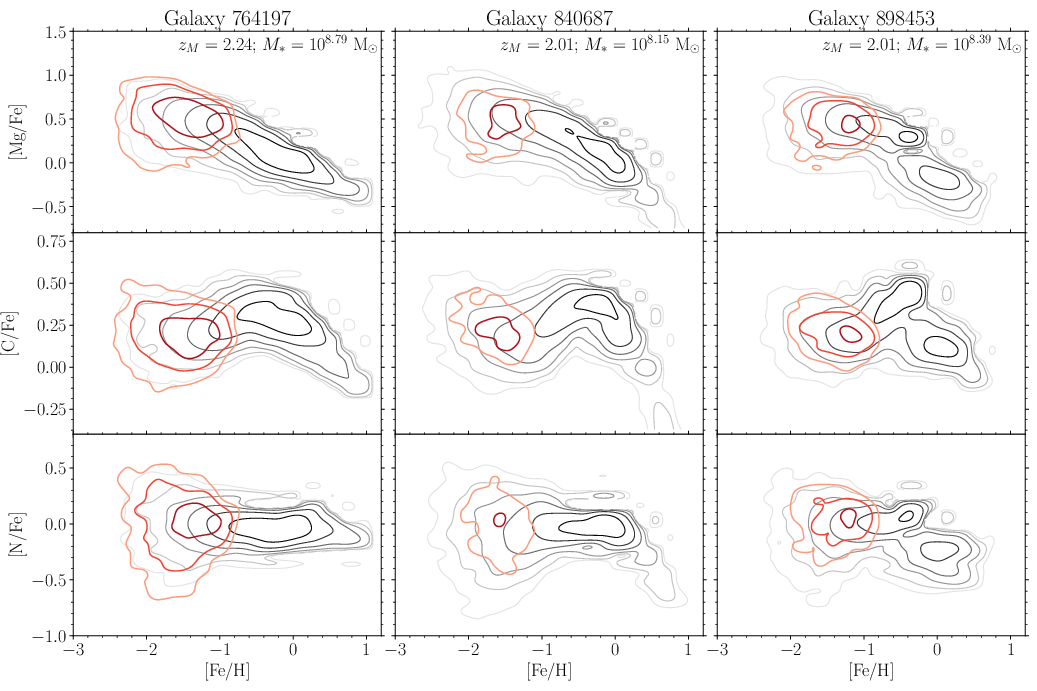

In [78]:
from wand.image import Image as WImage
img = WImage(filename='/Users/danny/Desktop/IG-structure/plots/figure7.pdf')
img


Figure 8. For this figure you need the sklearn module installed

11.53134297520661
0.9999999999999997
0.9960447360234492
17.118181818181814
1.0000000000000002
0.9998186702813157
16.950413223140494
1.0
0.9984773878820751


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:121: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:126: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:131: RuntimeWarning: divide by zero encountered in true_divide


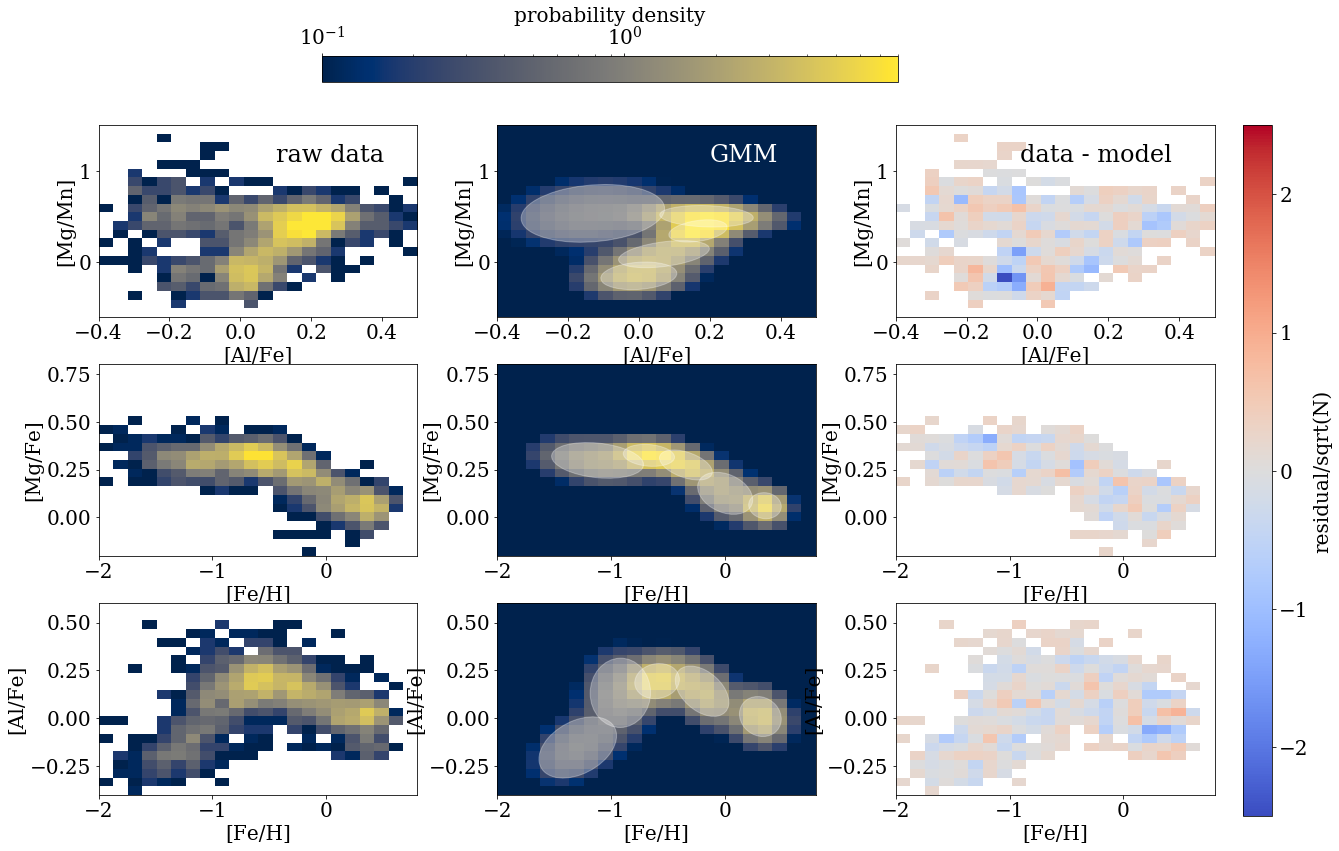

In [79]:
from sklearn.mixture import GaussianMixture as skl_GMM
import matplotlib

# MG/MN
# params = {'axes.labelsize': 14, 'xtick.labelsize': 14, 'ytick.labelsize': 14, 'text.usetex': True, 'lines.linewidth': 1,
#          'axes.titlesize': 12, 'font.family': 'serif'}
#number of components
N_comp = 5
#initialise and fit GMM
gmm = skl_GMM(n_components=N_comp, covariance_type='full')
gmm.fit(np.dstack([alfe[mask&(rads<3)][alfe[mask&(rads<3)]<0.5],mgmn[mask&(rads<3)][alfe[mask&(rads<3)]<0.5]])[0])
#prepare Fe/H and Al/Fe bins
alfemin, alfemax = -0.4, 0.5
mgmnmin, mgmnmax = -0.6,1.5
x = np.linspace(alfemin, alfemax,23)
y = np.linspace(mgmnmin, mgmnmax,23)
dx, dy = x[1]-x[0], y[1]-y[0]
#generate histogram at these bins
hist, xedges,yedges = np.histogram2d(alfe[mask&(rads<3)][alfe[mask&(rads<3)]<0.5],mgmn[mask&(rads<3)][alfe[mask&(rads<3)]<0.5], bins=[x,y])
histnorm = np.sum(hist)*dx*dy
print(histnorm)
hist = hist/histnorm
poisson = np.sqrt(hist)
histnorm = np.sum(hist)*dx*dy
print(histnorm)
#find bin centers
xc = (x[1:]+x[:-1])/2.
yc = (y[1:]+y[:-1])/2.
#make a grid at the bin centers
X, Y = np.meshgrid(xc, yc)
XX = np.array([X.ravel(), Y.ravel()]).T
#estimate the gmm density at the bin centers
Z = gmm.score_samples(XX)
Z = Z.reshape(X.shape)
datanorm = np.sum(hist)
modelnorm = np.sum(np.exp(Z))*dx*dy
print(modelnorm)
hist = hist#/datanorm
Z = np.exp(Z)/modelnorm

# MG/FE
#number of components
N_comp = 5
mask2= (fehs[mask&(rads<3)]<-0.5)&(mgfe[mask&(rads<3)]<0.15)
#initialise and fit GMM
gmm2 = skl_GMM(n_components=N_comp, covariance_type='full')
gmm2.fit(np.dstack([fehs[mask&(rads<3)][(~mask2)],mgfe[mask&(rads<3)][~mask2]])[0])
#prepare Fe/H and Al/Fe bins
alfemin2, alfemax2 = -2., 0.8
mgmnmin2, mgmnmax2 = -0.2, 0.8
x2 = np.linspace(alfemin2, alfemax2,23)
y2 = np.linspace(mgmnmin2, mgmnmax2,23)
dx2, dy2 = x2[1]-x2[0], y2[1]-y2[0]
#generate histogram at these bins
hist2, xedges2,yedges2 = np.histogram2d(fehs[mask&(rads<3)][~mask2],mgfe[mask&(rads<3)][~mask2], bins=[x2,y2])
histnorm2 = np.sum(hist2)*dx2*dy2
print(histnorm2)
hist2 = hist2/histnorm2
poisson2 = np.sqrt(hist2)
histnorm2 = np.sum(hist2)*dx2*dy2
print(histnorm2)
#find bin centers
xc2 = (x2[1:]+x2[:-1])/2.
yc2 = (y2[1:]+y2[:-1])/2.
#make a grid at the bin centers
X2, Y2 = np.meshgrid(xc2, yc2)
XX2 = np.array([X2.ravel(), Y2.ravel()]).T
#estimate the gmm density at the bin centers
Z2 = gmm2.score_samples(XX2)
Z2 = Z2.reshape(X2.shape)
datanorm2 = np.sum(hist2)
modelnorm2 = np.sum(np.exp(Z2))*dx2*dy2
print(modelnorm2)
hist2 = hist2#/datanorm
Z2 = np.exp(Z2)/modelnorm2

# AL/FE
#number of components
N_comp = 5
#initialise and fit GMM
mask3 = (fehs[mask&(rads<3)]>-0.8)&(alfe[mask&(rads<3)]<-0.2)
gmm3 = skl_GMM(n_components=N_comp, covariance_type='full')
gmm3.fit(np.dstack([fehs[mask&(rads<3)][(alfe[mask&(rads<3)]<0.5)&~mask3],alfe[mask&(rads<3)][(alfe[mask&(rads<3)]<0.5)&~mask3]])[0])
#prepare Fe/H and Al/Fe bins
alfemin3, alfemax3 = -2., 0.8
mgmnmin3, mgmnmax3 = -0.4, 0.6
x3 = np.linspace(alfemin3, alfemax3,23)
y3 = np.linspace(mgmnmin3, mgmnmax3,23)
dx3, dy3 = x3[1]-x3[0], y3[1]-y3[0]
#generate histogram at these bins
hist3, xedges3,yedges3 = np.histogram2d(fehs[mask&(rads<3)][(alfe[mask&(rads<3)]<0.5)&~mask3],alfe[mask&(rads<3)][(alfe[mask&(rads<3)]<0.5)&~mask3], bins=[x3,y3])
histnorm3 = np.sum(hist3)*dx3*dy3
print(histnorm3)
hist3 = hist3/histnorm3
poisson3 = np.sqrt(hist3)
histnorm3 = np.sum(hist3)*dx3*dy3
print(histnorm3)
#find bin centers
xc3 = (x3[1:]+x3[:-1])/2.
yc3 = (y3[1:]+y3[:-1])/2.
#make a grid at the bin centers
X3, Y3 = np.meshgrid(xc3, yc3)
XX3 = np.array([X3.ravel(), Y3.ravel()]).T
#estimate the gmm density at the bin centers
Z3 = gmm3.score_samples(XX3)
Z3 = Z3.reshape(X3.shape)
datanorm3 = np.sum(hist3)
modelnorm3 = np.sum(np.exp(Z3))*dx3*dy3
print(modelnorm3)
hist3 = hist3#/datanorm
Z3 = np.exp(Z3)/modelnorm3

#now make the plot
fig, ax = plt.subplots(3,3, sharex=False, sharey=False)
fig.set_size_inches(20,12)

# Mg/Mn
cb2 = ax[0,0].imshow(np.rot90(hist),extent=[alfemin,alfemax,mgmnmin,mgmnmax],aspect='auto',norm=matplotlib.colors.LogNorm(vmin=0.1,vmax=8.),cmap=plt.cm.cividis)
cb3 = ax[0,1].imshow(Z[::-1],extent=[alfemin,alfemax,mgmnmin,mgmnmax],aspect='auto',norm=matplotlib.colors.LogNorm(vmin=0.1,vmax=8.),cmap=plt.cm.cividis)
residual = np.rot90(hist)-Z[::-1]
cb = ax[0,2].imshow(residual/np.rot90(poisson),extent=[alfemin,alfemax,mgmnmin,mgmnmax],aspect='auto',cmap=plt.cm.coolwarm,vmin=-2.5,vmax=2.5)
# Mg/fe
cb4 = ax[1,0].imshow(np.rot90(hist2),extent=[alfemin2,alfemax2,mgmnmin2,mgmnmax2],aspect='auto',norm=matplotlib.colors.LogNorm(vmin=0.1,vmax=8.),cmap=plt.cm.cividis)
cb5 = ax[1,1].imshow(Z2[::-1],extent=[alfemin2,alfemax2,mgmnmin2,mgmnmax2],aspect='auto',norm=matplotlib.colors.LogNorm(vmin=0.1,vmax=8.),cmap=plt.cm.cividis)
residual2 = np.rot90(hist2)-Z2[::-1]
c6 = ax[1,2].imshow(residual2/np.rot90(poisson2),extent=[alfemin2,alfemax2,mgmnmin2,mgmnmax2],aspect='auto',cmap=plt.cm.coolwarm,vmin=-2.5,vmax=2.5)
# Al/Fe
cb7 = ax[2,0].imshow(np.rot90(hist3),extent=[alfemin3,alfemax3,mgmnmin3,mgmnmax3],aspect='auto',norm=matplotlib.colors.LogNorm(vmin=0.1,vmax=8.),cmap=plt.cm.cividis)
cb8 = ax[2,1].imshow(Z3[::-1],extent=[alfemin3,alfemax3,mgmnmin3,mgmnmax3],aspect='auto',norm=matplotlib.colors.LogNorm(vmin=0.1,vmax=8.),cmap=plt.cm.cividis)
residual3 = np.rot90(hist3)-Z3[::-1]
cb9 = ax[2,2].imshow(residual3/np.rot90(poisson3),extent=[alfemin3,alfemax3,mgmnmin3,mgmnmax3],aspect='auto',cmap=plt.cm.coolwarm,vmin=-2.5,vmax=2.5)

#move the panels to the left and down to make space for color bars
plt.subplots_adjust(right=0.9, wspace=0.1, top=0.9)
#label the panels
ax[0,0].text(0.1,1.1,r'raw data', color='k',fontsize=24)
ax[0,1].text(0.2,1.1,r'GMM', color='White',fontsize=24)
ax[0,2].text(-0.05,1.1,r'data - model',fontsize=24)

#plot colorbars
cax = fig.add_axes([0.92,0.1,0.02,0.8])
cax2 = fig.add_axes([0.28,0.95,0.4,0.03])
plt.colorbar(cb, cax=cax, label=r'residual/sqrt(N)')
plt.colorbar(cb2, cax=cax2, label=r'probability density', orientation='horizontal')
cax2.xaxis.set_ticks_position('top')
cax2.xaxis.set_label_position('top')
#x and y axis labels
ax[0,0].set_ylabel(r'[Mg/Mn]')
ax[1,0].set_ylabel(r'[Mg/Fe]')
ax[2,0].set_ylabel(r'[Al/Fe]')
ax[0,0].set_xlabel(r'[Al/Fe]')
ax[1,0].set_xlabel(r'[Fe/H]')
ax[2,0].set_xlabel(r'[Fe/H]')

ax[0,1].set_ylabel(r'[Mg/Mn]')
ax[1,1].set_ylabel(r'[Mg/Fe]')
ax[2,1].set_ylabel(r'[Al/Fe]')
ax[0,1].set_xlabel(r'[Al/Fe]')
ax[1,1].set_xlabel(r'[Fe/H]')
ax[2,1].set_xlabel(r'[Fe/H]')

ax[0,2].set_ylabel(r'[Mg/Mn]')
ax[1,2].set_ylabel(r'[Mg/Fe]')
ax[2,2].set_ylabel(r'[Al/Fe]')
ax[0,2].set_xlabel(r'[Al/Fe]')
ax[1,2].set_xlabel(r'[Fe/H]')
ax[2,2].set_xlabel(r'[Fe/H]')

#plot the ellipses Mg/Mn vs Al/Fe
for i, (mean, cov) in enumerate(zip(gmm.means_, gmm.covariances_)):
    v, w = np.linalg.eigh(cov)
    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180. * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = matplotlib.patches.Ellipse(mean, v[0], v[1], 180. + angle, color='White', alpha=0.3)
    #ell.set_clip_box(ax[0].bbox)
    #ell.set_alpha(.5)
    ax[0,1].add_artist(ell)

#plot the ellipses Mg/Fe vs Fe/H
for i, (mean, cov) in enumerate(zip(gmm2.means_, gmm2.covariances_)):
    v, w = np.linalg.eigh(cov)
    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180. * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = matplotlib.patches.Ellipse(mean, v[0], v[1], 180. + angle, color='White', alpha=0.3)
    #ell.set_clip_box(ax[0].bbox)
    #ell.set_alpha(.5)
    ax[1,1].add_artist(ell)

#plot the ellipses Al/Fe vs Fe/H
for i, (mean, cov) in enumerate(zip(gmm3.means_, gmm3.covariances_)):
    v, w = np.linalg.eigh(cov)
    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180. * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = matplotlib.patches.Ellipse(mean, v[0], v[1], 180. + angle, color='White', alpha=0.3)
    #ell.set_clip_box(ax[0].bbox)
    #ell.set_alpha(.5)
    ax[2,1].add_artist(ell)

plt.subplots_adjust(hspace=0.25,wspace=0.25)

plt.savefig('/Users/danny/Desktop/IG-structure/plots/figure8.pdf', format='pdf', dpi=400, bbox_inches='tight')


Figure 9

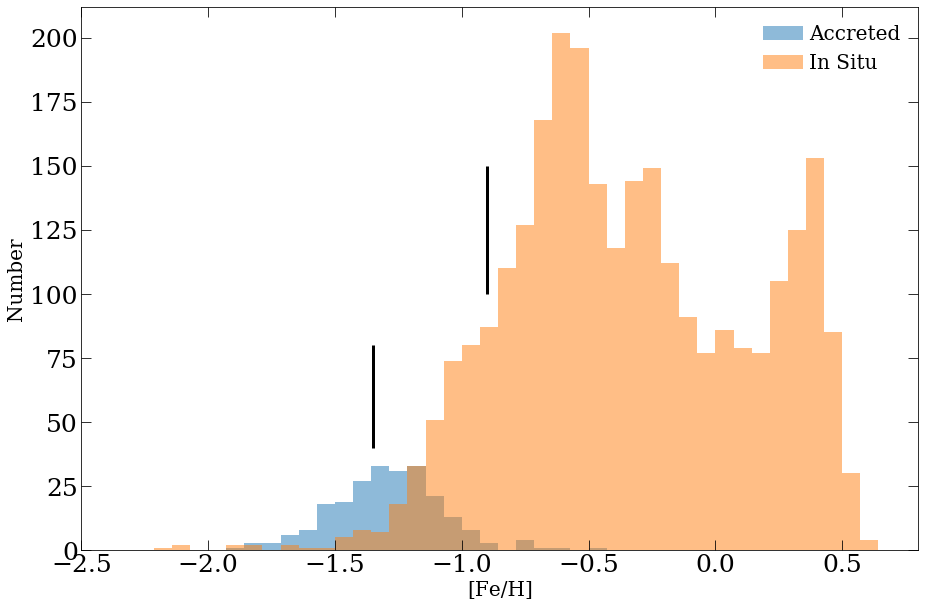

In [80]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 10
#Figure settings (font sizes of ticks and labels)
labs=20
tcks=25

bins = np.linspace(-2.5,1,50)
plt.hist(fehs[mask&acc_mask&(rads<3)], bins, alpha=0.5, label='Accreted')
plt.hist(fehs[mask&~acc_mask&(rads<3)], bins, alpha=0.5, label='In Situ')
plt.xlabel('[Fe/H]',size=labs)
plt.ylabel('Number',size=labs)
plt.legend(frameon=False,fontsize=20,handletextpad=0.3,loc='upper right')
plt.xticks(fontsize=tcks)
plt.yticks(fontsize=tcks)
plt.vlines(-0.9,100,150,color='k',lw=3)
plt.vlines(-1.35,40,80,color='k',lw=3)
plt.xlim(-2.5,0.8)
plt.tick_params(direction='in',right=True,top=True,length=10,labelright=False)
plt.savefig('/Users/danny/Desktop/IG-structure/plots/figure9.pdf', format='pdf', dpi=400, bbox_inches='tight')


Figure 10

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:69: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:69: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:69: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
/opt/anaconda3/lib/python3.7/si

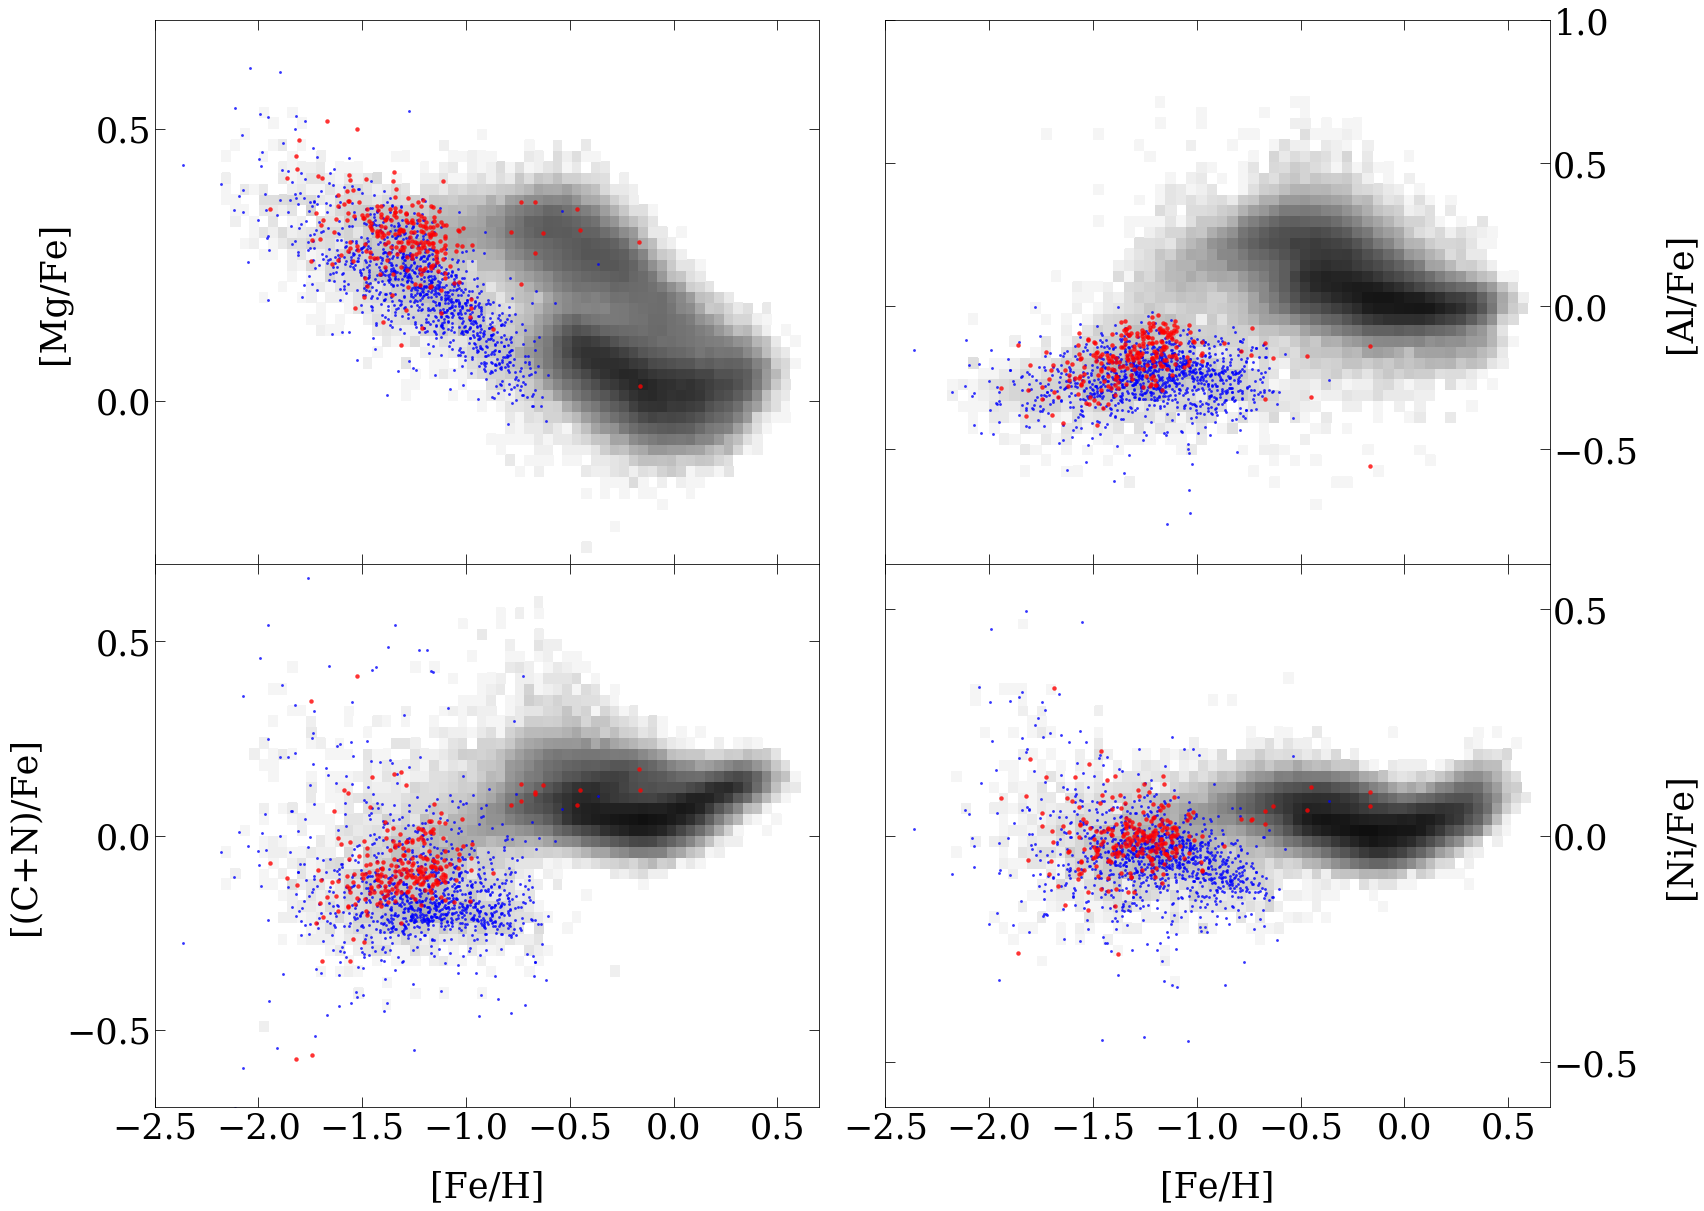

In [81]:
#GE/S and IG in abundance space
import matplotlib as mpl
labs=35
tcks=35
cmax = 4000
fig= plt.figure(figsize=(25,20),constrained_layout=True)

gs = gridspec.GridSpec(2,2)
gs.update(wspace=0.1, hspace=0) # set the spacing between axes. 

plt.subplot(gs[0])
plt.hist2d(fehs[mask], mgfe[mask], norm=mpl.colors.LogNorm(), bins=(70, 50),range=[[-2.5,0.7],[-0.3,0.7]], cmap='Greys')
plt.clim(1,cmax)
plt.scatter(fehs[mask&acc_mask][mask_ge], mgfe[mask&acc_mask][mask_ge], c='blue', alpha=0.8,s=8,lw=0)
plt.scatter(fehs[mask&acc_mask][mask_ig], mgfe[mask&acc_mask][mask_ig], c='red', alpha=0.8,s=20,lw=0)
plt.xticks((np.arange(-3.0,1.5,step=0.5)),fontsize=tcks)
plt.yticks((np.arange(-1.5,1.5,step=0.5)),fontsize=tcks)
plt.ylabel('[Mg/Fe]',size=labs,labelpad=25)
#plt.xlabel('[Fe/H]',size=labs,labelpad=25)
plt.tick_params(direction='in',right=True,top=True,length=10,labelbottom=False)
plt.xlim(-2.5,0.7)
plt.ylim(-0.3,0.7)

ax = plt.subplot(gs[1])
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.yaxis.set_ticks_position("both")
plt.hist2d(fehs[mask], alfe[mask], norm=mpl.colors.LogNorm(), bins=(70, 50),range=[[-2.5,1],[-0.9,1]], cmap='Greys')
plt.clim(1,cmax)
plt.scatter(fehs[mask&acc_mask][mask_ge], alfe[mask&acc_mask][mask_ge], c='blue', alpha=0.8,s=8,lw=0)
plt.scatter(fehs[mask&acc_mask][mask_ig], alfe[mask&acc_mask][mask_ig], c='red', alpha=0.8,s=20,lw=0)
plt.xticks((np.arange(-3.0,1.5,step=0.5)),fontsize=tcks)
plt.yticks((np.arange(-1.5,1.5,step=0.5)),fontsize=tcks)
#plt.xlabel('[Fe/H]',size=labs,labelpad=25)
plt.ylabel('[Al/Fe]',size=labs,labelpad=25)
plt.xlim(-2.5,0.7)
plt.ylim(-0.9,1)
plt.tick_params(direction='in',right=True,top=True,length=10,labelbottom=False,labelright=True)

plt.subplot(gs[2])
plt.hist2d(fehs[mask], cnfe[mask], norm=mpl.colors.LogNorm(), bins=(70, 50),range=[[-2.5,0.7],[-0.7,0.7]], cmap='Greys')
plt.clim(1,cmax)
plt.scatter(fehs[mask&acc_mask][mask_ge], cnfe[mask&acc_mask][mask_ge], c='blue', alpha=0.8,s=8,lw=0)
plt.scatter(fehs[mask&acc_mask][mask_ig], cnfe[mask&acc_mask][mask_ig], c='red', alpha=0.8,s=20,lw=0)
plt.xticks((np.arange(-3.0,1.5,step=0.5)),fontsize=tcks)
plt.yticks((np.arange(-1.5,1.5,step=0.5)),fontsize=tcks)
plt.ylabel('[(C+N)/Fe]',size=labs,labelpad=25)
plt.xlabel('[Fe/H]',size=labs,labelpad=25)
plt.tick_params(direction='in',right=True,top=True,length=10,labelbottom=True)
plt.xlim(-2.5,0.7)
plt.ylim(-0.7,0.7)


ax = plt.subplot(gs[3])
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.yaxis.set_ticks_position("both")
plt.hist2d(fehs[mask], nife[mask], norm=mpl.colors.LogNorm(), bins=(70, 50),range=[[-2.5,0.7],[-0.6,0.6]], cmap='Greys')
plt.clim(1,cmax)
plt.scatter(fehs[mask&acc_mask][mask_ge], nife[mask&acc_mask][mask_ge], c='blue', alpha=0.8,s=8,lw=0)
plt.scatter(fehs[mask&acc_mask][mask_ig], nife[mask&acc_mask][mask_ig], c='red', alpha=0.8,s=20,lw=0)
plt.xticks((np.arange(-3.0,1.5,step=0.5)),fontsize=tcks)
plt.yticks((np.arange(-1.5,1.5,step=0.5)),fontsize=tcks)
plt.ylabel('[Ni/Fe]',size=labs,labelpad=25)
plt.xlabel('[Fe/H]',size=labs,labelpad=25)
plt.xlim(-2.5,0.7)
plt.ylim(-0.6,0.6)
plt.tick_params(direction='in',right=True,top=True,length=10,labelbottom=True,labelright=True)
plt.savefig('/Users/danny/Desktop/IG-structure/plots/figure10.pdf', format='pdf', dpi=400, bbox_inches='tight')



Figure 11

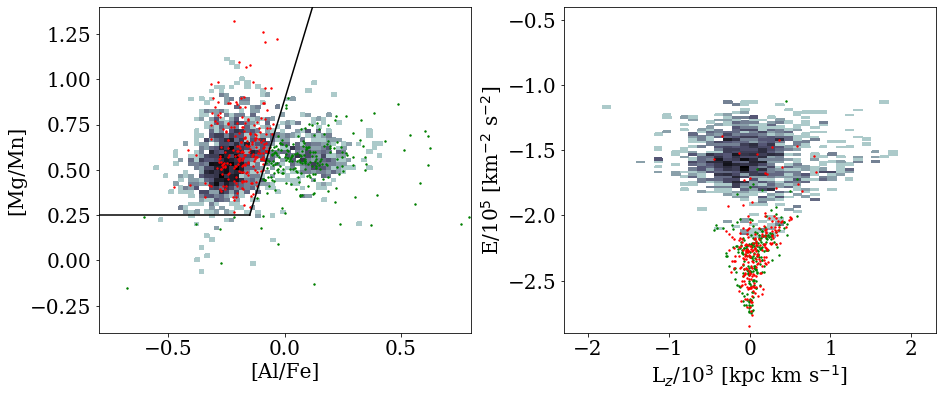

In [82]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 6
#Figure settings (font sizes of ticks and labels)
labs=20
tcks=25

plt.subplot(1,2,1)
plt.hist2d(alfe[mask&(fehs<-1)&(rads>3)],mgmn[mask&(fehs<-1)&(rads>3)],bins = 100,cmap='bone_r',norm=LogNorm())
plt.scatter(alfe[mask&~acc_mask&(rads<3)&(fehs<-1)],mgmn[mask&~acc_mask&(rads<3)&(fehs<-1)],c='g',s=2)
plt.scatter(alfe[mask&acc_mask&(rads<3)&(fehs<-1)],mgmn[mask&acc_mask&(rads<3)&(fehs<-1)],c='r',s=2)
plt.plot([-1,-0.15],[0.25,0.25], 'k', c='black')
x = np.arange(-0.15,0.4,0.01)
plt.plot(x,4.25*x+0.8875, 'k', c='black')
plt.xlabel('[Al/Fe]',size=labs)
plt.ylabel('[Mg/Mn]',size=labs)
plt.xlim(-0.8,0.8)
plt.ylim(-0.4,1.4)

plt.subplot(1,2,2)
plt.hist2d(lz[mask&acc_mask&(rads>3)]/1e3,E[mask&acc_mask&(rads>3)]/1e5,bins = 100,cmap='bone_r',norm=LogNorm())
plt.scatter(lz[mask&~acc_mask&(rads<3)&(fehs<-1)]/1e3,E[mask&~acc_mask&(rads<3)&(fehs<-1)]/1e5,c='g',s=2)
plt.scatter(lz[mask&acc_mask&(rads<3)&(fehs<-1)]/1e3,E[mask&acc_mask&(rads<3)&(fehs<-1)]/1e5,c='r',s=2)
plt.xlabel('L$_{z}$/10$^{3}$ [kpc km s$^{-1}$]',size=labs)
plt.ylabel('E/10$^{5}$ [km$^{-2}$ s$^{-2}$]',size=labs)
plt.xlim(-2.3,2.3)
plt.ylim(-2.9,-0.4)

plt.subplots_adjust(hspace=0,wspace=0.25)
plt.savefig('/Users/danny/Desktop/IG-structure/plots/figure11.pdf', format='pdf', dpi=400, bbox_inches='tight')
